# Project 1 Writing a Data Scientist Blog Post

## Datasets: AirBnB Dataset Menorca, Islas Baleares, Spain

### Question 1
What is on average the summer price increase of AirBnB accomodations in Menorca?

### Question 2
Can someone overnight in Menorca for less than 35 USD in any of season? If so, in which neighbourhood adn type of accoommodation?

### Question 3
Compare a Decision Tree, Random Forest and Gradient Boost ML models to predict AirBnB accomodations average prices in Menorca. Which one is more promising?



## Getting somewhat familiar with the data

The following .csv files will be used for this project:

- **calendar.csv**: Detailed Calendar Data for listings in Menorca
- **listings.csv**: Detailed Listings data for Menorca
- **listings_summary.csv**: Summary information and metrics for listings in Menorca. (File originally called listings.csv)

Data was compiled the 30th April 2020 and downloaded from http://insideairbnb.com/get-the-data.html


In [1]:
# Import relevant modules for Exploratory Data Analysis (EDA)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
# Read .csv files

raw_listings = pd.read_csv('listings.csv')
raw_listings_summary = pd.read_csv('listings_summary.csv')
raw_calendar = pd.read_csv('calendar.csv')

# Display of columns and show only first 5 rows of the dataframe
pd.set_option('display.max_columns', None)

In [3]:
# Quick glance at listings df
print('Number of rows:', raw_listings.shape[0], '; Number of columns:', raw_listings.shape[1])
raw_listings.head()

Number of rows: 3060 ; Number of columns: 106


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44085,https://www.airbnb.com/rooms/44085,20200430215057,2020-05-01,Villa in Addaia great sea view and fun pool,Best view ever on the bay of Port d'Addaia and...,House with great and unbelievable view on the ...,Best view ever on the bay of Port d'Addaia and...,none,NaN,NaN,The villa has a parking space for two cars.,"The whole villa, pool, garden and parking spac...",I'd love to welcome my guests if I'm in Menorc...,No smoking inside the property and no pets all...,NaN,NaN,https://a0.muscache.com/im/pictures/1ea5fde7-3...,NaN,193043,https://www.airbnb.com/users/show/193043,Manuela,2010-08-06,"Sant Lluís, Illes Balears, Spain","I'm based in Menorca, but travel frequently to...",within a few hours,100%,100%,f,https://a0.muscache.com/im/pictures/user/39f8c...,https://a0.muscache.com/im/pictures/user/39f8c...,NaN,4.0,4.0,"['email', 'phone', 'reviews', 'manual_offline'...",t,t,"Puerto Luz, Balearic Islands, Spain",NaN,Es Mercadal,NaN,Puerto Luz,Balearic Islands,07740,Menorca,"Puerto Luz, Spain",ES,Spain,40.00946,4.20026,f,Villa,Entire home/apt,6,2.0,3.0,5.0,Real Bed,"{TV,Internet,Wifi,Pool,Kitchen,""Free parking o...",NaN,$99.00,NaN,NaN,$85.00,$125.00,6,$0.00,5,550,5,5,550,550,5.0,550.0,3 months ago,t,30,60,84,220,2020-05-01,14,0,2012-07-06,2018-08-25,94.0,10.0,10.0,10.0,10.0,10.0,9.0,t,NaN,NaN,t,f,moderate,t,t,4,4,0,0,0.15
1,102558,https://www.airbnb.com/rooms/102558,20200430215057,2020-05-01,appartment in Menorca -Cala Galdana,"bonito apartamento en cala Galdana, en una zon...",Special offer low season. 55 qm appartment in ...,Special offer low season. 55 qm appartment in ...,none,NaN,NaN,NaN,NaN,NaN,Haz uso del apartamento como si fuera de tu pr...,NaN,NaN,https://a0.muscache.com/im/pictures/23614875/a...,NaN,536023,https://www.airbnb.com/users/show/536023,Yolanda,2011-04-26,"Barcelona, Cataluña, Spain","me encanta viajar a lugares nuevos, conocer ge...",within an hour,100%,92%,f,https://a0.muscache.com/im/users/536023/profil...,https://a0.muscache.com/im/users/536023/profil...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Ciutadella de Menorca, Illes Balears, Spain",NaN,Ciutadella de Menorca,NaN,Ciutadella de Menorca,Illes Balears,07750,Menorca,"Ciutadella de Menorca, Spain",ES,Spain,39.94273,3.96278,t,Apart

In [4]:
# Quick glance at listings_summary df
print('Number of rows:', raw_listings_summary.shape[0], '; Number of columns:', raw_listings_summary.shape[1])
raw_listings_summary.head()

Number of rows: 3060 ; Number of columns: 16


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44085,Villa in Addaia great sea view and fun pool,193043,Manuela,NaN,Es Mercadal,40.00946,4.20026,Entire home/apt,99,5,14,2018-08-25,0.15,4,220
1,102558,appartment in Menorca -Cala Galdana,536023,Yolanda,NaN,Ciutadella de Menorca,39.94273,3.96278,Entire home/apt,50,7,29,2019-08-03,0.27,1,126
2,148138,APARTMENT TO RENT IN CIUTADELLA,715601,Jose Luis,NaN,Ciutadella de Menorca,40.00222,3.79919,Entire home/apt,49,1,18,2020-01-03,0.21,3,333
3,245722,Son Magna. Charm and intimacy in a farm in Alaior,1289210,Miguel,NaN,Alaior,39.89677,4.14912,Private room,200,3,19,2019-07-20,0.27,1,317
4,285865,Apartment sea view + swimming pool,1487752,Roberto,NaN,Ciutadella de Menorca,40.00088,3.79955,Entire home/apt,69,4,68,2019-10-18,0.71,1,300


In [5]:
# Quick glance at calendar df
print('Number of rows:', raw_calendar.shape[0], '; Number of columns:', raw_calendar.shape[1])
raw_calendar.head()

Number of rows: 1117017 ; Number of columns: 7


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2476704,2020-05-02,t,$188.00,$188.00,5.0,1125.0
1,954903,2020-05-01,f,$248.00,$248.00,7.0,30.0
2,954903,2020-05-02,f,$248.00,$248.00,7.0,30.0
3,954903,2020-05-03,t,$248.00,$248.00,7.0,30.0
4,954903,2020-05-04,t,$248.00,$248.00,7.0,30.0


In [6]:
# Checking that 'id' is a primary key

if raw_listings['id'].value_counts().sum() == raw_listings.shape[0]:
    print ("'id' and 'listing_id' variables represent the same accommodation")

'id' and 'listing_id' variables represent the same accommodation


In [7]:
# Checking that all 'id' values are in 'listings_id'

id_values = np.sort(raw_listings['id'].unique()) # Numpy array with all the ids ascending sorted
listing_id_values = np.sort(raw_calendar['listing_id'].unique()) # Numpy array with all the listing_id values ascending sorted

if np.array_equal(id_values, listing_id_values): # Check if arrays are equal
    print('All AirBnb accomodations in menorca have information stored in raw_calendar')
else:
    print('Some accomodations are not in raw_calendar')


All AirBnb accomodations in menorca have information stored in raw_calendar


**Notes**

- *raw_listings* has stored all the information of AirBnB accommodations in Menorca dated 30th April 2020.
- *raw_listings_summary* has stored a summary of the information included in *raw_listings* but also a variable 'price' that is not in *raw_listing*.
- *raw_calendar* has stored a time series of AirBnB accomodations prices in Menorca plus minimum and maximum nights.
- It is possible to easily work with the 3 dataframes by using the Primary Key `id` of *raw_listings* and *raw_listings_summary* and the Secondary Key `listings_id` of *raw_calendar*.
- There are some variables that can be explained just from the title. There are other variables that could be understood from the title and by doing some quick checks. However, there might be some cases where it is not possible to clearly determine what data a column represents and it is not possible to ask the people who gathered this data at AirBnB. For this reason, I will try to use only variables that can be fully explained with the information available from the dataset.

### Question 1: What is on average the summer price increase of AirBnB accomodations in Menorca?

To answer this question, I am going to work with *raw_calendar*. This dataframe has stored a time series of the AirBnB accomodations prices in Menorca.

I am going to use Pandas time series tools in order to find the answer of this question.

First, I am going to create a couple of functions. One for converting a df into a timeseries and another for cleaning a currency column and converting it into a numeric column.

Note this is not strictly necessary but it organises the code a little bit.

In [8]:
def df_to_timeseries(df, date_col):

    ''' INPUT:
    df - the dataframe to be converted into a time series
    date_col - string with the title of the column that has dates stored in df
    OUTPUT:
    timeseries - a timeseries holding all the information in df but with date_col converted into Timestamp object
    
    Provides a timeseries from a dataframe with a date column
    '''

    #Convert 'date' column into pandas TimeStamp object
    df[date_col] = pd.to_datetime(df[date_col])
    # Set date as index of the df
    df = df.set_index(date_col)
    # Sort index
    df = df.sort_index()
    
    return df

In [9]:
def clean_currency(df, currency_col, currency, num_type):

    ''' INPUT:
    df - the dataframe with a currency type column
    currency_col - string. Title of the column that has currency values stored in df
    currency - string. Symbol of the currency to be removed
    num_type - string. Int or float
    OUTPUT:
    df - a pandas dataframe with numeric currency type column
    
    Converts a currency type column (object type) into a numeric column.
    '''
    # Delete currency symbol and commas
    df[currency_col] = df[currency_col].str.replace(currency, '')
    df[currency_col] = df[currency_col].str.replace(',', '')
    #Convert into numeric
    df[currency_col] = pd.to_numeric(df[currency_col], downcast=num_type)
    
    return df

In [10]:
# Convert raw_calendar into timeseries
prices_data = df_to_timeseries(raw_calendar, 'date')

# Clean price and adjusted price columns and convert into numeric
prices_data = clean_currency(df=prices_data, currency_col='price', currency='$', num_type='float') # Convert price
prices_data = clean_currency(df=prices_data, currency_col='adjusted_price', currency='$', num_type='float') # Convert adjusted_price

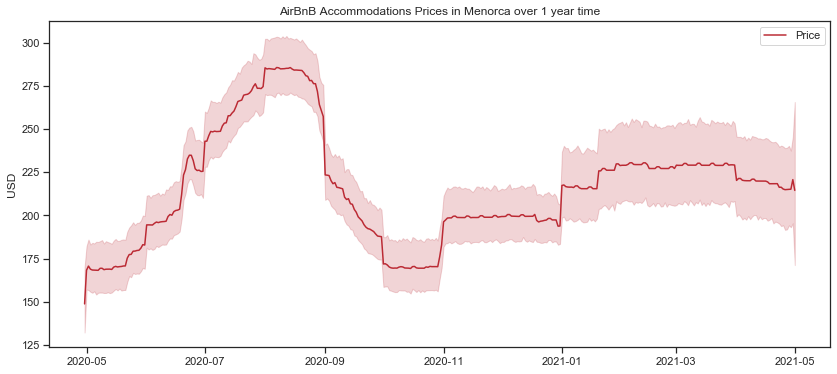

In [11]:
# Line chart of prices of AirBnB accomodations over the time
sns.set_palette("RdBu", n_colors=7)
sns.set_style("ticks")


# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("AirBnB Accommodations Prices in Menorca over 1 year time")
#Add y axis
plt.ylabel('USD')

# Line chart showing monthly visits
sns.lineplot(data=prices_data['price'], label="Price", dashes=False)
plt.show()

**This Line chart shows the mean and the 95% confidence interval around the mean of the AirBnB accommodations prices in Menorca over 1 year time.**

As it can be spotted from the result above, there is data available until May 2021. That is next year at the time this project is being worked on. One reason that would explain this interesting finding is that there are already bookings for next year.

Another thing that can be easily spotted is that prices sharply increase from May to Aug, when the curve flattens until end of Aug and then sharply declines. This is something that I expected as per my question 1.

It can also be seen an increasing trend from Nov 2020 to end of Apr 2021. According to this data, the price of an AirBnB accommodation in Menorca in May 2021 is more expensive than in May 2020 one year ago.

Let´s try to answer Question 1 now that I have confirmed that prices are actually significantly higher in summer than in winter.

**How am I gonna approach this problem?**

Step 1. Create a dataframe/timeseries called **winter_months** that will store prices_data corresponding to winter months. Similarly, create another dataframe/timeseries called **summer_months** that will store prices_data corresponding to summer months.

Step 2. Use **winter_months** and **summer_months** to create 2No. dataframes called **winter_prices** and **summer_prices** containing the mean price of each AirBnB accommodation.


Step 3. Create a new dataframe called **quest_1** which will contain the following columns:

- `listing_id` : Index
- `winter_mean_price`: Mean value of an AirBnB accommodation during winter months in Menorca
- `summer_mean_price`: Mean value of an AirBnB accommodation during summer months in Menorca
- `price_diff`: Price summer increase of an AiBnB accommodation in Menorca

In [12]:
def timeseries_slicer(df, start_date, end_date):
    
    '''INPUT:
    df - a timeseries stored in a pandas dataframe (date needs to be index of the df) 
    start_date - string with start date of period to be considered
    end_date - string with end date of period to be considered 
    
    OUTPUT:
    df_sliced - a timeseries stored in a pandas dataframe for the period under consideration
    
    This function takes a timeseries stores in a dataframe with the date as index, a string with a start date
    and another string with an end date. It returns a timeseries stored in a pandas dataframe with all the data
    in the original dataframe in the period of time between start_data and end_date.
    '''
    # slice timeseries
    df_sliced = df[start_date:end_date]
    
    return df_sliced
    

In [13]:
# Winter months of timeseries in dataframe. Spanish winter months - 21 Dec to 21 Mar
winter_months = timeseries_slicer(df=prices_data, start_date='2020-12-21', end_date='2021-03-21')

# Mean price for each AirBnB accommodation during winter months
winter_prices = winter_months[['listing_id','price']].groupby(['listing_id']).mean()
winter_prices = winter_prices.rename(columns={"price": "winter_mean_price"}) # Renaming price col

# Summer months of timeseries in dataframe. Spanish summer months - 21 Jun to 21 Sep
summer_months = timeseries_slicer(df=prices_data, start_date='2020-06-21', end_date='2021-09-21')

# Mean price for each AirBnB accommodation during winter months
summer_prices = summer_months[['listing_id','price']].groupby(['listing_id']).mean()
summer_prices = summer_prices.rename(columns={"price": "summer_mean_price"}) # Renaming price col

# Joining winter_prices and summer_prices
quest_1 = winter_prices.join(summer_prices)

As I am trying to calculate the mean price increase, I will check for **outliers** as the mean is a measure of central tendency which is very sensitive to outliers. For this example, I am going to drop the outliers as these probably represent very expensive and luxurious accommodations.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


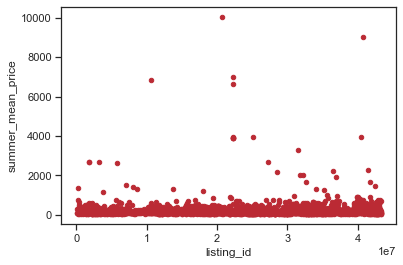

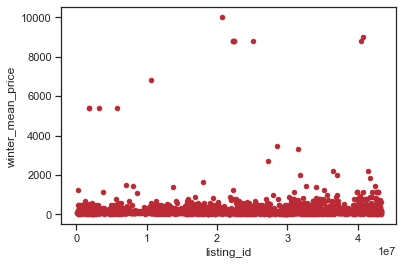

In [14]:
# Reset index for visulisations
quest_1 = quest_1.reset_index()

# Outliers in summer_mean_price and winter_mean_price
quest_1.plot.scatter(x='listing_id', y='summer_mean_price')
quest_1.plot.scatter(x='listing_id', y='winter_mean_price')

We can crearly see some outliers in this scatter plots. I am going to drop all the accommodations with mean prices over 4,500 USD.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


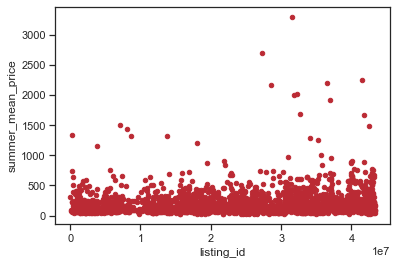

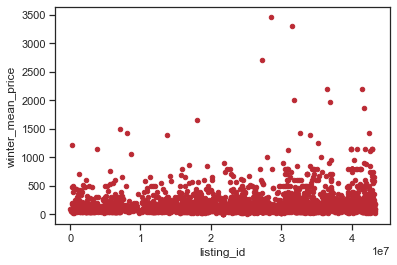

In [15]:
# Dropping summer mean prices and winter mean prices over 4,500 USD.
quest_1.drop(quest_1[quest_1['summer_mean_price']>4500].index, inplace=True)
quest_1.drop(quest_1[quest_1['winter_mean_price']>4500].index, inplace=True)

# Plotting scatter plots to check outliers have been dropped
quest_1.plot.scatter(x='listing_id', y='summer_mean_price')
quest_1.plot.scatter(x='listing_id', y='winter_mean_price')

I can now calculate mean price increases of each accommodation and then average price increase.

In [16]:
# Creating price_diff. Assume all accommodations are more expensive in the summer.
quest_1['price_diff'] = ((quest_1['summer_mean_price']-quest_1['winter_mean_price'])
                         /quest_1['winter_mean_price'])*100

I have obtained the following data by doing some Data Wrangling and using simple Descriptive Statistics:

- Winter mean price of all AirBnB accommodations in Menorca
- Summer mean price of all AirBnB accommodations in Menorca
- Mean price summer increase of all AirBnB accommodations in Menorca

I am now in a position to answer question 1:

What is on average the summer price increase of AirBnB accomodations in Menorca?

In [17]:
answer_1 = quest_1['price_diff'].mean()
print('On average, the summer price increase of an AirBnB accommodation in Menorca is:', answer_1)

On average, the summer price increase of an AirBnB accommodation in Menorca is: inf


Price_diff.mean() returns *inf* because, for some reason, there are accommodations with winter price equal to 0. Furthermore, there might be accommodations with negative price increases because I assumed all the AirBnB accommodations were more expensive during summer months, which means a positive price increase. However, there might be a small number of accommodations that are actually cheaper in summer and therefore the price increase is negative.

Note that we have a dataset of only 1 year. There might be several reasons that could explain price decreases such as a new listed property that overestimated its value or the effect of COVID-19 on the tourism market for 2021. Let´s check for inf values and if the number of accommodations with price decrease are significant.

In [18]:
# Check number of inf values in price_diff
count=0
for i in quest_1['price_diff']:
    if i == np.inf:
        count+=1        
print('There are', count, 'inf values in price_diff')

There are 7 inf values in price_diff


In [19]:
# Proportion of AirBnB accomodations that will be cheaper next summer
count = 0
for i in quest_1['price_diff']:
    if i <0:
        count+=1
print('The ', round(((count/quest_1.shape[0])*100),2),
      '% of the AirBnB accommodations in Menorca will be cheaper in summer than in winter')

The  14.82 % of the AirBnB accommodations in Menorca will be cheaper in summer than in winter


As mentioned above, the reason behind price decrases might be business strategies to tackle COVID-19 effect on economy or just something that happens every year due to several factors. As I have only infomraiton about 1 year, this cannot be checked and I will not consider these accommodations. Similarly, I will not consider accommodations without winter price and they don´t add any value to answer question 1.

In [20]:
# Drop accommodations with inf value in price_diff
quest_1.drop(quest_1[quest_1['price_diff']==np.inf].index, inplace=True)

# Drop accommodations with negative value in price_diff
quest_1.drop(quest_1[quest_1['price_diff']<0].index, inplace=True)

In [21]:
answer_1 = round(quest_1['price_diff'].mean(),2)
print('On average, the summer price increase of an AirBnB accommodation in Menorca is:', answer_1, '%')

On average, the summer price increase of an AirBnB accommodation in Menorca is: 23.22 %


### Question 2: Can someone overnight in Menorca for less than 35 USD in any of season? If so, in which neighbourhood and type of accommodation?

To answer this question, I am going to work with *raw_listings_summary*. This dataframe has stored a summary of raw_listings of AirBnB accommodations in Menorca.

This dataframe has a `price` column. In the absence of more information, I am going to assume that this column represents the price of the accommodation at the day when the data was scrapped. There might be prices variations within a neighborhood over the time but this data should be enough to answer Question 2 in Menorca.

As this questions is quite simple, I will use only some data wrangling and visulization.

In [22]:
# Quick look at raw_listings_summary columns

raw_listings_summary.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44085,Villa in Addaia great sea view and fun pool,193043,Manuela,NaN,Es Mercadal,40.00946,4.20026,Entire home/apt,99,5,14,2018-08-25,0.15,4,220
1,102558,appartment in Menorca -Cala Galdana,536023,Yolanda,NaN,Ciutadella de Menorca,39.94273,3.96278,Entire home/apt,50,7,29,2019-08-03,0.27,1,126
2,148138,APARTMENT TO RENT IN CIUTADELLA,715601,Jose Luis,NaN,Ciutadella de Menorca,40.00222,3.79919,Entire home/apt,49,1,18,2020-01-03,0.21,3,333
3,245722,Son Magna. Charm and intimacy in a farm in Alaior,1289210,Miguel,NaN,Alaior,39.89677,4.14912,Private room,200,3,19,2019-07-20,0.27,1,317
4,285865,Apartment sea view + swimming pool,1487752,Roberto,NaN,Ciutadella de Menorca,40.00088,3.79955,Entire home/apt,69,4,68,2019-10-18,0.71,1,300


**Notes**

I am interested in grouping by 'Neighbourhood' and 'room_type'. This is probably what I need to answer question 2.

In [23]:
# New dataframe with columns of interest
quest_2 = raw_listings_summary[['id','neighbourhood','room_type', 'price']]

# Group by neighbourhood and room_type
grouped_quest_2 = quest_2.groupby(['neighbourhood','room_type'])

# Check grouped df
for key, item in grouped_quest_2:
    print(grouped_quest_2.get_group(key), "\n\n")

            id neighbourhood        room_type  price
5       294398        Alaior  Entire home/apt    450
6       295705        Alaior  Entire home/apt   1250
9       357026        Alaior  Entire home/apt     75
10      358378        Alaior  Entire home/apt     40
12      366636        Alaior  Entire home/apt    100
...        ...           ...              ...    ...
3008  42992770        Alaior  Entire home/apt    113
3046  43217675        Alaior  Entire home/apt     65
3048  43237088        Alaior  Entire home/apt    200
3051  43256705        Alaior  Entire home/apt    213
3057  43313068        Alaior  Entire home/apt     60

[387 rows x 4 columns] 


            id neighbourhood   room_type  price
1110  20507054        Alaior  Hotel room     60 


            id neighbourhood     room_type  price
3       245722        Alaior  Private room    200
153    2722356        Alaior  Private room     60
1038  19600347        Alaior  Private room     60
1420  24373658        Alaior  Private 

In [24]:
# Display minimum prices
min_prices = grouped_quest_2.min()

# Reset index
min_prices = min_prices.reset_index()

# Groupby for each room type
for i in min_prices['room_type'].unique():
    if i == 'Entire home/apt':
        min_prices_home = min_prices[min_prices['room_type']=='Entire home/apt']
    elif i == 'Hotel room':
        min_prices_hotel = min_prices[min_prices['room_type']=='Hotel room']
    elif i == 'Private room':
        min_prices_priv = min_prices[min_prices['room_type']=='Private room']
    else:
        min_prices_shared = min_prices[min_prices['room_type']=='Shared room']


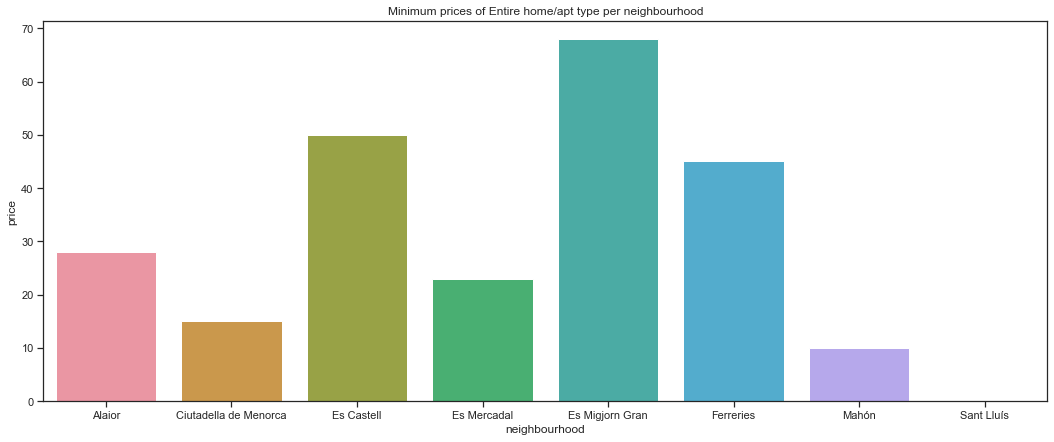

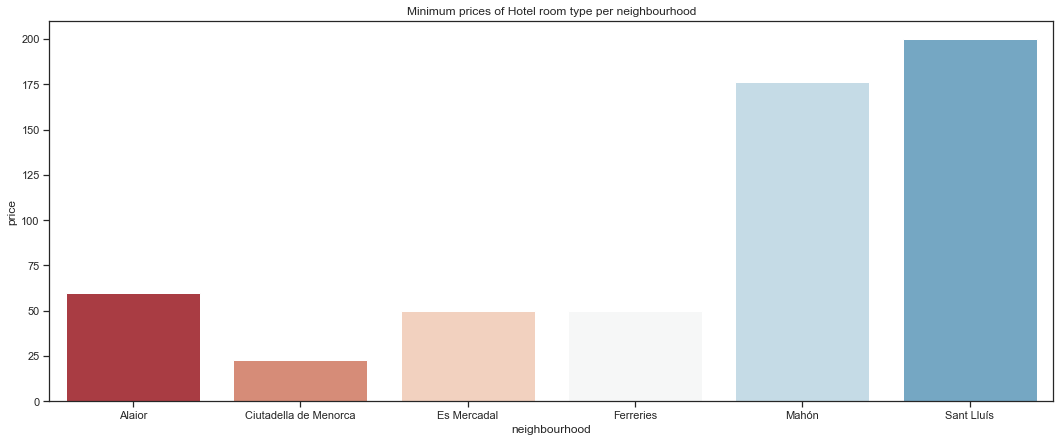

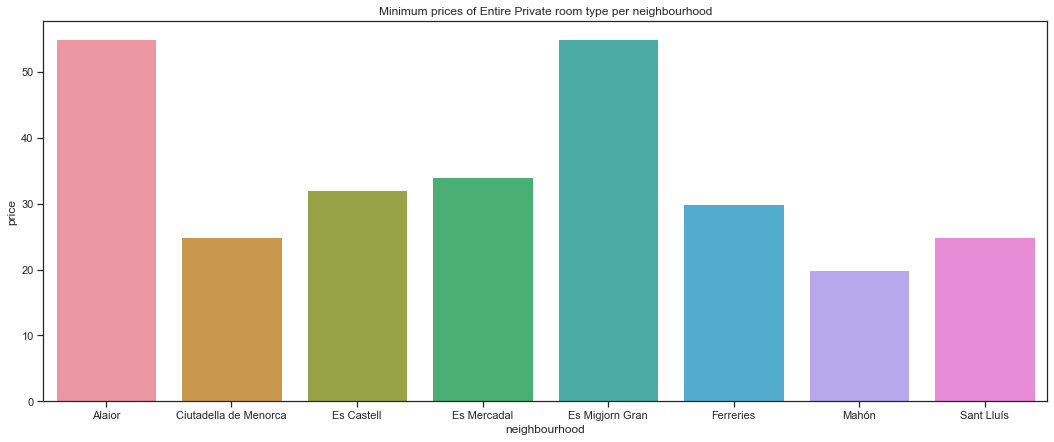

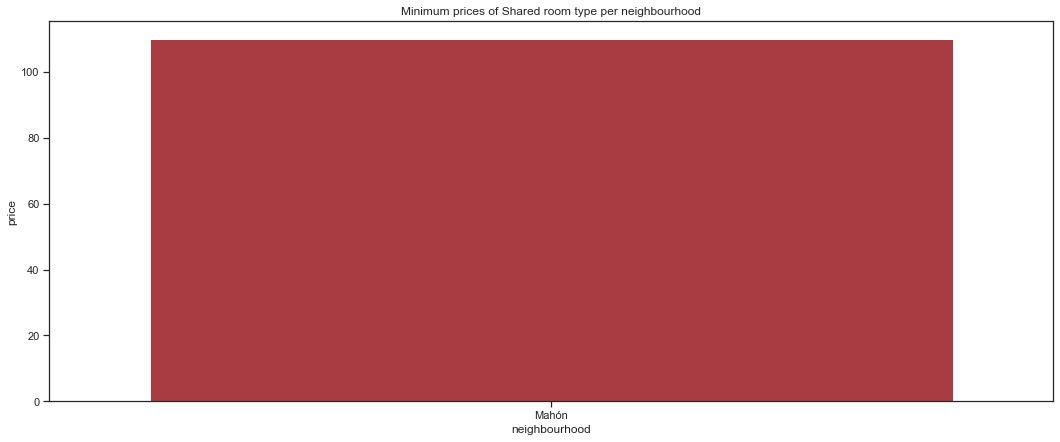

In [25]:
# Let´s plot the dataframes in a bar chart
# Set figure size
plt.figure(figsize=(18, 7))

# Bar chart showing minimum prices of an Entire home/apt
plt.title('Minimum prices of Entire home/apt type per neighbourhood')
sns.barplot(x=min_prices_home['neighbourhood'], y=min_prices_home['price'])

# Set figure size
plt.figure(figsize=(18, 7))

# Bar chart showing minimum prices of an Entire home/apt
plt.title('Minimum prices of Hotel room type per neighbourhood')
sns.barplot(x=min_prices_hotel['neighbourhood'], y=min_prices_hotel['price'])

# Set figure size
plt.figure(figsize=(18, 7))

# Bar chart showing minimum prices of an Entire home/apt
plt.title('Minimum prices of Entire Private room type per neighbourhood')
sns.barplot(x=min_prices_priv['neighbourhood'], y=min_prices_priv['price'])

# Set figure size
plt.figure(figsize=(18, 7))

# Bar chart showing minimum prices of an Entire home/apt
plt.title('Minimum prices of Shared room type per neighbourhood')
sns.barplot(x=min_prices_shared['neighbourhood'], y=min_prices_shared['price'])

**Notes**

And the answer to Question 2 is yes! You can overnight in an AirBnB accommodation in Menorca for less than 35 USD.

- If you would like to stay in an Entire home or apartment for less than 35 USD/night, you can do it in Alaior, Ciudatella de Menorca, Es Mercadal and Mahón as shown in the bar chart. However, Mahón has a minimum price of 10 USD which seems to low so, unless there is an error, it might not be your best choice!
- If you would like to stay in an Hotel for less than 35 USD/night, you could only do it in Ciudatella de Menorca.
- If you would like to stay in an Entire private room for less than 35 USD/night, you have many choices: Ciudatella de Menorca, Es Castell, Es Mercadal, Ferreries, Mahón and Sant LLuís.
- There is only a shared room type accommodation in Mahón and the price shown is likely to be monthly so this is not considered in the analysis.

Now we simply needed to dig deeper into the data and find out during which seasons these accommodations have the lowest price in order to plan a budget trip!

### Question 3: Business Case - Compare a Decision Tree, Random Forest and Gradient Boost ML models to predict AirBnB prices in Menorca. Which one is more promising?

Questions 1 & 2 were just out of curiority. Let´s jump into a business case.

I friend contacted me because he owns a property in Menorca and would like to list it on AirBnB next year to make an extra income. He has a figure in mind of the price/per night so instead of just comparing prices of similar properties etc., he would like me to develop a ML that can predict prices so he can check if his figure is realistic.

For this, I am going to use raw_listings dataframe.

### Understanding the data

#### First glance at the data

In [26]:
# Copy of original dataframe
listings_df = raw_listings.copy()

# Quick glance at the data
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44085,https://www.airbnb.com/rooms/44085,20200430215057,2020-05-01,Villa in Addaia great sea view and fun pool,Best view ever on the bay of Port d'Addaia and...,House with great and unbelievable view on the ...,Best view ever on the bay of Port d'Addaia and...,none,NaN,NaN,The villa has a parking space for two cars.,"The whole villa, pool, garden and parking spac...",I'd love to welcome my guests if I'm in Menorc...,No smoking inside the property and no pets all...,NaN,NaN,https://a0.muscache.com/im/pictures/1ea5fde7-3...,NaN,193043,https://www.airbnb.com/users/show/193043,Manuela,2010-08-06,"Sant Lluís, Illes Balears, Spain","I'm based in Menorca, but travel frequently to...",within a few hours,100%,100%,f,https://a0.muscache.com/im/pictures/user/39f8c...,https://a0.muscache.com/im/pictures/user/39f8c...,NaN,4.0,4.0,"['email', 'phone', 'reviews', 'manual_offline'...",t,t,"Puerto Luz, Balearic Islands, Spain",NaN,Es Mercadal,NaN,Puerto Luz,Balearic Islands,07740,Menorca,"Puerto Luz, Spain",ES,Spain,40.00946,4.20026,f,Villa,Entire home/apt,6,2.0,3.0,5.0,Real Bed,"{TV,Internet,Wifi,Pool,Kitchen,""Free parking o...",NaN,$99.00,NaN,NaN,$85.00,$125.00,6,$0.00,5,550,5,5,550,550,5.0,550.0,3 months ago,t,30,60,84,220,2020-05-01,14,0,2012-07-06,2018-08-25,94.0,10.0,10.0,10.0,10.0,10.0,9.0,t,NaN,NaN,t,f,moderate,t,t,4,4,0,0,0.15
1,102558,https://www.airbnb.com/rooms/102558,20200430215057,2020-05-01,appartment in Menorca -Cala Galdana,"bonito apartamento en cala Galdana, en una zon...",Special offer low season. 55 qm appartment in ...,Special offer low season. 55 qm appartment in ...,none,NaN,NaN,NaN,NaN,NaN,Haz uso del apartamento como si fuera de tu pr...,NaN,NaN,https://a0.muscache.com/im/pictures/23614875/a...,NaN,536023,https://www.airbnb.com/users/show/536023,Yolanda,2011-04-26,"Barcelona, Cataluña, Spain","me encanta viajar a lugares nuevos, conocer ge...",within an hour,100%,92%,f,https://a0.muscache.com/im/users/536023/profil...,https://a0.muscache.com/im/users/536023/profil...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Ciutadella de Menorca, Illes Balears, Spain",NaN,Ciutadella de Menorca,NaN,Ciutadella de Menorca,Illes Balears,07750,Menorca,"Ciutadella de Menorca, Spain",ES,Spain,39.94273,3.96278,t,Apart

In [27]:
listings_df.describe(include='all')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.060000e+03,3060,3.060000e+03,3060,3060,2983,2024,3034,3060,1734,1183,1478,1242,1413,1797,0.0,0.0,3060,0.0,3.060000e+03,3060,3059,3059,3049,1748,2590,2590,2797,3059,3059,3059,122,3059.000000,3059.000000,3060,3059,3059,3060,0.0,3060,0.0,3046,2619,2981,3060,3060,3060,3060,3060.000000,3060.000000,3060,3060,3060,3060.000000,3060.000000,3059.000000,3056.000000,3060,3060,25.000000,3060,98,58,2284,2277,3060.000000,3060,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060,3060,3060.000000,3060.000000,3060.000000,3060.000000,3060,3060.000000,3060.000000,1986,1986,1958.000000,1957.000000,1958.000000,1954.000000,1956.000000,1953.000000,1952.000000,3060,1636,0.0,3060,3060,3060,3060,3060,3060.000000,3060.000000,3060.000000,3060.000000,1986.000000
unique,NaN,3060,NaN,3,2980,2781,1871,2888,1,1371,915,1317,1066,1161,1051,NaN,NaN,2985,NaN,NaN,1388,802,1078,315,592,4,28,72,2,1380,1380,29,NaN,NaN,109,2,2,410,NaN,8,NaN,209,34,40,2,210,1,1,NaN,NaN,2,28,4,NaN,NaN,NaN,NaN,2,2752,NaN,407,59,41,57,89,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,1,NaN,NaN,NaN,NaN,3,NaN,NaN,895,446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1322,NaN,2,1,6,2,2,NaN,NaN,NaN,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/25895424,NaN,2020-05-01,Disfrute de Menorca,Complejo de apartamentos en la Urbanización de...,Es un complejo de 4 Estrellas Superior. La pos...,Complejo de apartamentos en la Urbanización de...,none,Very quiet neighborhood.,The host will contact you to request the ident...,"El apartamento está en una zona tranquila, con...","Instalaciones como piscina, de adulto como inf...",Estoy disponible para ayudarles en caso necesa...,Smoking is not allowed Pets are not allowed Mi...,NaN,NaN,https://a0.muscache.com/im/pictures/fe95f526-c...,NaN,NaN,https://www.airbnb.com/users/show/266459123,Bookiply,2019-06-05,ES,We are the UK's leading villa holiday speciali...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/7d7a5...,https://a0.muscache.com/im/pictures/user/7d7a5...,Urbanització Can Porquer,NaN,NaN,"['email', 'phone']",t,f,"Ciutadella de Menorca, Illes Balears, Spain",NaN,Ciutadella de Menorca,NaN,Ciutadella de Menorca,Illes Balears,07769,Menorca,"Ciutadella de Menorca, Spain",ES,Spain,NaN,NaN,f,Villa,Entir

In [28]:
# Checking that each row represents an accommodation
if listings_df.shape[0] == listings_df['id'].count():
    print('Each row represents an AirBnB accommodation')

Each row represents an AirBnB accommodation


There is a whole bunch of categorical/text variables. Note also that columns with currency data will need to be converted into numeric.

Many columns have to do with AirBnB website such as `listing_url` or `scrape_id`. We will not get any valuable information from variables like these one.

My aim is to determine which model is more promising so I am going to select the **features** that I think will be the better **predictors of `price`.**

I am going to use the following predictors:

- Predictors relating to location: `street`, `neighbourhood_cleansed`, `city`, `latitude` and `longitude`.
- Predictors relating to accommodation type: `property_type`, `room_type`, `accommodates`, `bathrooms`, `bedrooms`, `beds`, `bed_type`, `square_feet`.
- Predictors relating to bookings: `security deposit`, `cleaning_fee`, `minimum_nights`, `instant_bookable`, `cancellation_policy`.

I could have used information about host and reviews that probably are good predictors of price too but, as we want to predict the price of an acommodation that will be first time listed on AirBnB, we cannot use this information. However, it is worth bearing this in mind as my friend might want to use this model in 1 years´ time after listed the property and including this information might make a difference in the model performance.

In [29]:
# Store predictors and response in a new dataframe
data = listings_df[['street','neighbourhood_cleansed','city','latitude','longitude',
                    'property_type','room_type','accommodates','bathrooms','bedrooms',
                    'beds','bed_type','square_feet','security_deposit','cleaning_fee',
                    'minimum_nights','instant_bookable','cancellation_policy','price']]
data.head()

,street,neighbourhood_cleansed,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,security_deposit,cleaning_fee,minimum_nights,instant_bookable,cancellation_policy,price
0,"Puerto Luz, Balearic Islands, Spain",Es Mercadal,Puerto Luz,40.00946,4.20026,Villa,Entire home/apt,6,2.0,3.0,5.0,Real Bed,NaN,$85.00,$125.00,5,t,moderate,$99.00
1,"Ciutadella de Menorca, Illes Balears, Spain",Ciutadella de Menorca,Ciutadella de Menorca,39.94273,3.96278,Apartment,Entire home/apt,5,1.0,2.0,5.0,Real Bed,NaN,$200.00,$75.00,7,f,strict_14_with_grace_period,$50.00
2,"Menorca, Balearic Islands, Spain",Ciutadella de Menorca,Menorca,40.00222,3.79919,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,646.0,$150.00,$75.00,1,t,strict_14_with_grace_period,$49.00
3,"Alaior, Menorca, Spain",Alaior,Alaior,39.89677,4.14912,Villa,Private room,6,3.0,3.0,6.0,Real Bed,200.0,$800.00,NaN,3,f,strict_14_with_grace_period,$200.00
4,"Menorca, Balearic Islands, Spain",Ciutadella de Menorca,Menorca,40.00088,3.79955,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,$100.00,$40.00,4,f,strict_14_with_grace_period,$69.00


In [30]:
# Converting currency data into numeric
data = clean_currency(df=data, currency_col='security_deposit', currency='$', num_type='float')
data = clean_currency(df=data, currency_col='cleaning_fee', currency='$', num_type='float')
data = clean_currency(df=data, currency_col='price', currency='$', num_type='float')

/Users/bernardogarcia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/bernardogarcia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/bernardogarcia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [31]:
# Checking currency data is numeric
data.loc[:, ('security_deposit','cleaning_fee', 'price')]

,security_deposit,cleaning_fee,price
0,85.0,125.0,99.0
1,200.0,75.0,50.0
2,150.0,75.0,49.0
3,800.0,NaN,200.0
4,100.0,40.0,69.0
...,...,...,...
3055,NaN,NaN,175.0
3056,300.0,78.0,179.0
3057,0.0,30.0,60.0
3058,NaN,NaN,100.0


In [32]:
data.describe(include='all')

,street,neighbourhood_cleansed,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,security_deposit,cleaning_fee,minimum_nights,instant_bookable,cancellation_policy,price
count,3060,3060,3046,3060.000000,3060.000000,3060,3060,3060.000000,3060.000000,3059.000000,3056.000000,3060,25.000000,2284.000000,2277.000000,3060.000000,3060,3060,3060.000000
unique,410,8,209,NaN,NaN,28,4,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,6,NaN
top,"Ciutadella de Menorca, Illes Balears, Spain",Ciutadella de Menorca,Ciutadella de Menorca,NaN,NaN,Villa,Entire home/apt,NaN,NaN,NaN,NaN,Real Bed,NaN,NaN,NaN,NaN,t,strict_14_with_grace_period,NaN
freq,369,1286,544,NaN,NaN,889,2820,NaN,NaN,NaN,NaN,3057,NaN,NaN,NaN,NaN,1791,1681,NaN
mean,NaN,NaN,NaN,39.940484,4.031327,NaN,NaN,5.704575,1.889379,2.692056,4.255236,NaN,857.360000,201.292465,39.297321,4.277778,NaN,NaN,189.207184
std,NaN,NaN,NaN,0.071288,0.179199,NaN,NaN,2.459009,1.117750,1.352506,2.312346,NaN,1526.949188,316.971313,52.389965,7.330339,NaN,NaN,332.092590
min,NaN,NaN,NaN,39.809670,3.795730,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,39.884387,3.835138,NaN,NaN,4.000000,1.000000,2.000000,3.000000,NaN,0.000000,0.000000,0.000000,2.000000,NaN,NaN,75.000000
50%,NaN,NaN,NaN,39.940870,4.071905,NaN,NaN,6.000000,2.000000,3.000000,4.000000,NaN,331.000000,100.000000,20.000000,4.000000,NaN,NaN,120.000000
75%,NaN,NaN,NaN,40.002223,4.194580,NaN,NaN,7.000000,2.000000,3.000000,5.000000,NaN,1023.000000,300.000000,60.000000,6.000000,NaN,NaN,205.250000


In [33]:
# % of missing values in 'square_feet'
print('The', round(((data['square_feet'].isnull().sum()/data['square_feet'].shape[0])*100),2),
      "% of square_feet are missing values")

# of missing values in 'security_deposit'
print('The', round(((data['security_deposit'].isnull().sum()/data['security_deposit'].shape[0])*100),2),
      "% of security_deposit are missing values")

# of missing values in 'cleaning_fee'
print('The', round(((data['cleaning_fee'].isnull().sum()/data['cleaning_fee'].shape[0])*100),2),
      "% of cleaning_fee are missing values")

The 99.18 % of square_feet are missing values
The 25.36 % of security_deposit are missing values
The 25.59 % of cleaning_fee are missing values


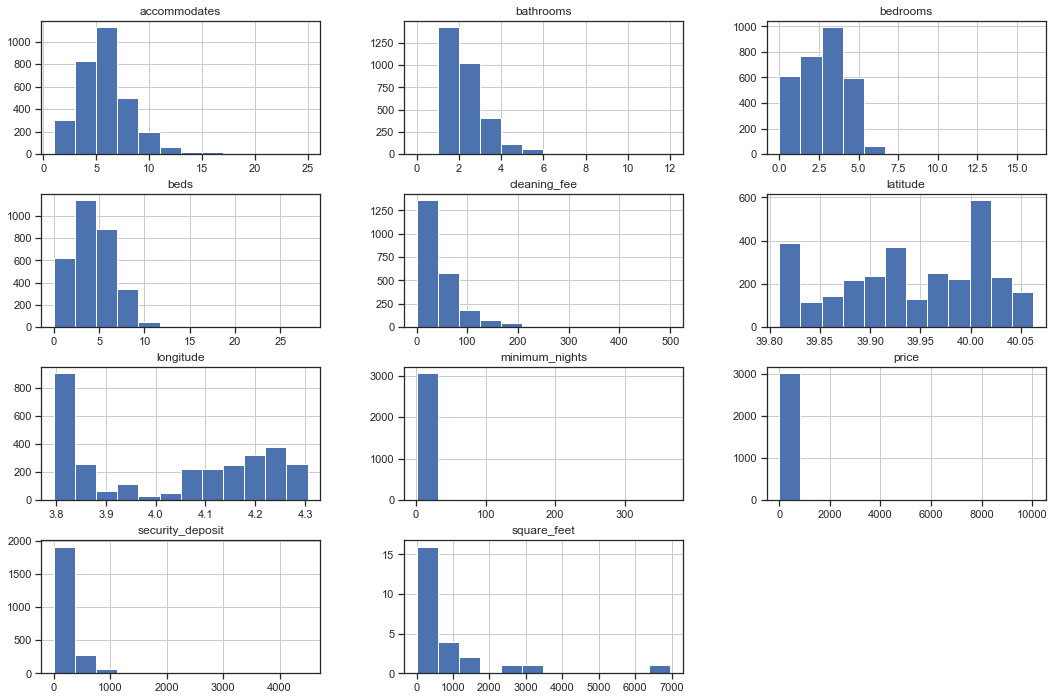

In [34]:
# plot a histogram of the dataset

sns.set_palette("deep", n_colors=7)
sns.set_style("ticks")

data.hist(bins=12, figsize=(18,12))
plt.show()

**Missing Values**

- `square_feet` will not add much value to the models as the 99.18% are NaNs and this only shows that hosts tend to not include this data in the listings. I can safely drop this column.
- `security_deposit` and `cleaning_fee` have some missing values (approx. 25%) but I can impute them. I will deal with this later.
- The rest of the features have less than 15 missing values out of 3600 data points, which is great.

**Categorical Variables**

I have some categorial variables that will need to be encoded but some of them like `neighbourhood_cleansed` might play an important role as location is one of the most important indicators of accommodation prices.

**Numerical Features**

- `accommodates`, `bathrooms`, `bedrooms`, `beds`, `cleaning_fee` and `security_deposit` are tail heavy. I can see a right-skewed distribution. This means there are outliers in the data. Some ML models do not learn well from outliers because they are not able to identify patterns in the data properly. This is something to bear in mind in the model selection stage.
- `latitude` and `longitude` do not follow any pattern.
- I cannot visualise the distribution of `minimum_nights` and `price` due to outliers again. For example, there is a data point with a value of 365 minimum nights. That´s a long-term letting agreement and AirBnB does not focus on that.

### Splitting the dataset

In [35]:
# Import sklearn train_test_split module

from sklearn.model_selection import train_test_split

# Spltting the dataset into train set and test set
train_set, test_set = train_test_split(data, test_size = 0.2, random_state=42)

I have considered purely random sampling and it works well with large datasets (amount of instances is much bigger than the number of attributes/features).

If the dataset is not large enough, there is a risk of introducing **sampling bias** and **stratified sampling** is more suitable. In this case, I have 3060 observations and 19 features so dataset size is ok for random sampling.

### Exploratory Data Analysis (EDA)

Having put the test set aside, I am going to look deeper into the data to get a better understanding.

In [36]:
# create a copy of the training set
eda_data = train_set.copy()

**Visualising geographical data**

As I mentioned before, location is usually one of the most important predictors when it comes to accommodation prices. This is something everyone knows frome experience. Let´s plot price geographical distribution in Menorca.

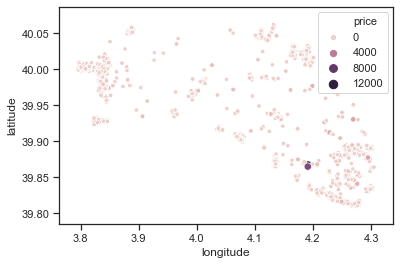

In [37]:
# Scatter plot of AirBnB accommodations prices geographically distributed
ax = sns.scatterplot(x="longitude", y="latitude", hue="price", size='price', data=eda_data)

**Outliers** do not allow me to visualise price geographical distribution. I am going to remove some of them.

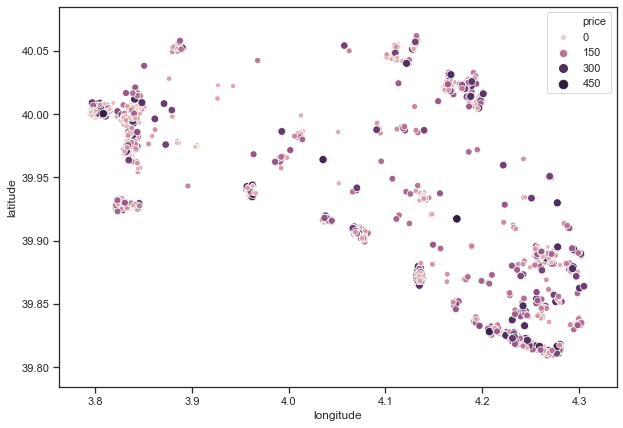

In [38]:
# Removing outliers to visualise price

# Declare a variable that will be equal to the 90th percentile of the 'Price' variable
q = eda_data['price'].quantile(0.90)
# Then we can create a new df, with the condition that all prices must be below the 90 percentile of 'Price'
df_1 = eda_data[eda_data['price']<q]

# Scatter plot of AirBnB accommodations prices geographically distributed

# Set figure size
plt.figure(figsize=(10, 7))
ax = sns.scatterplot(x="longitude", y="latitude", hue="price", size='price', data=df_1)

This gives me good insights.

![title](menorca_map.gif)



- The west of Menorca (Ciudatella) and the southeast of Menorca (Es Castell, Sant Lluís, Mahón) concentrates a significant proportion of the AirBnB accommodations in Menorca.
- Accommodations in the Southeast of Menorca appear to be more expensive than in the West of Menorca.
- There are also AirBnB accommodations concretrated at the North of the island (Fornells). These zone seem to be more expensive than the West of Menorca.
- There are some small aggregations of AirBnB accommodations that seem to be noticeably cheaper. These are probably low populated areas far from most visited locations in Menorca.


#### Looking for correlations

I can have a better understanding of the data by looking a the correlations between numerical features and the response.


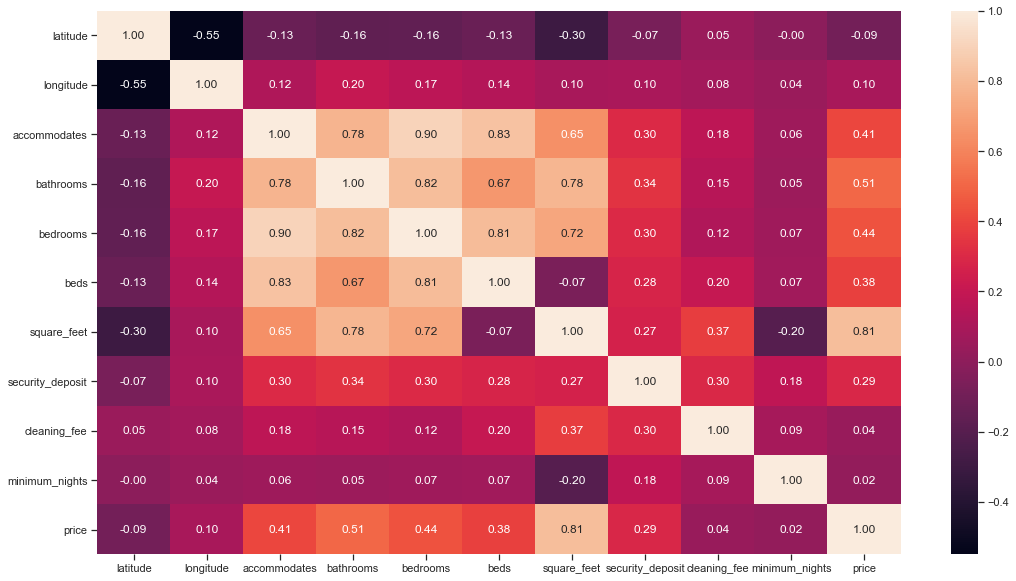

In [39]:
# Compute Pearson´s correlation matrix to determine linear relationships

# Set figure size
plt.figure(figsize=(18,10))
sns.heatmap(eda_data.corr(method='pearson'), annot=True, fmt=".2f")

`Price` and the following features are positively correlated: `accommodates`, `bathrooms`, `bedrooms` and `beds`. This is, if `prices`goes up, these variable go up as well.

`security_deposit` has a positive correlation with `price`too but lower. `cleaning_fee`and `minimum_nights`are not linearly correlated with `price`. I will drop them for a first approximation of the model.

Let´s have a closer look at the correlation of these features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25527d50>,
      dtype=object)

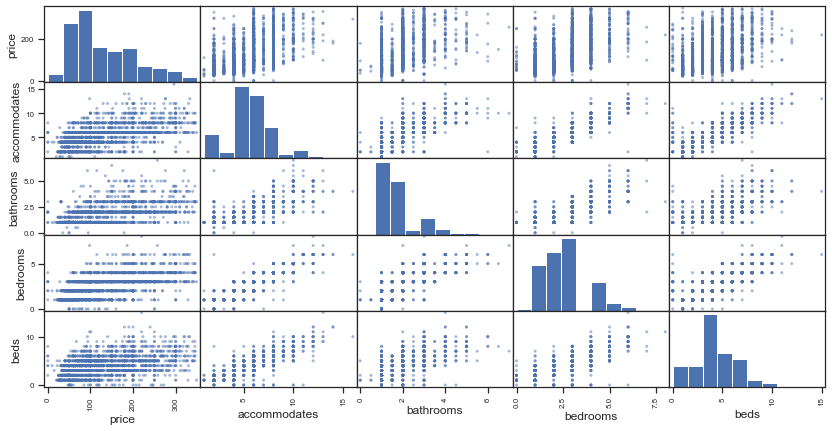

In [40]:
#Plot scatter_matrix using pandas scatter_matrix
from pandas.plotting import scatter_matrix

attributes = ['price','accommodates', 'bathrooms', 'bedrooms', 'beds']
scatter_matrix(df_1[attributes], figsize=(14,7))

I can distinguish the positive correlation in this scatter plots. Note there are 'lines' of points because `beds`, `bedrooms`, etc. are discrete variables.

I´m gonna use a simple approach and use only numerical features with a significant linear correlation.

### Data Preparation

**Preprocessing Steps:**

1. Impute missing values in numerical data
2. Impute missing values in categorical data
3. Encode categorical variables
4. Feature Scaling


In [41]:
# Copy of the training set
train_data = train_set.copy()
# Copyt of the test set
test_data = test_set.copy()

# Drop square_feet, cleaning_fee and minimum_nights
train_data = train_data.drop(['square_feet', 'cleaning_fee', 'minimum_nights',
                              'security_deposit', 'latitude', 'longitude'], axis=1)
test_data = test_data.drop(['square_feet', 'cleaning_fee', 'minimum_nights',
                              'security_deposit', 'latitude', 'longitude'], axis=1)

In [42]:
# Check proportion of missing values
(train_data.isnull().sum()/train_data.shape[0])*100

street                    0.000000
neighbourhood_cleansed    0.000000
city                      0.367647
property_type             0.000000
room_type                 0.000000
accommodates              0.000000
bathrooms                 0.000000
bedrooms                  0.040850
beds                      0.122549
bed_type                  0.000000
instant_bookable          0.000000
cancellation_policy       0.000000
price                     0.000000
dtype: float64

Target variable `price` does not have any missing value so I do not need to drop rows. Obviously, an instance with a NaN in the target value does not add any value.

I also need to check the cardinality of the categorical variables before choosing an encoding method.

In [43]:
# Checking cardinality of cat variables

# Save cat variables names in a list
s = (train_data.dtypes=='object')
cat_cols = list(s[s].index)

# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: train_data[col].nunique(), cat_cols))
d = dict(zip(cat_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('bed_type', 2),
 ('instant_bookable', 2),
 ('room_type', 4),
 ('cancellation_policy', 6),
 ('neighbourhood_cleansed', 8),
 ('property_type', 28),
 ('city', 189),
 ('street', 369)]

`street`,`city` and `property_type` have high cardinality. Particularly, `street` and `city`. I´m gonna use the **LeaveOneOut** encoding method for these variables and **One-hot encoding** for the rest of them.

This is because One-Hot Encoding categorical variables with many categories would hugely increase the size of the dataframe and this can lead to problems.

In [44]:
# Separate target
X_train = train_data.drop(['price'], axis=1)
y_train = train_data['price']
X_test = test_data.drop(['price'], axis=1)
y_test = test_data['price']

In [45]:
# Import Simple Imputer and OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder

**Imputing Missing Values in numerical variables using Sklearn SimpleImputer and mean values**

In [46]:
# Numerical variables
numerical_cols = [col for col in X_train.columns if X_train[col].dtype != ('object')]

# Calling SimpleImputer
numerical_transformer = SimpleImputer(strategy = 'mean')

# Fit Simple Imputer and impute(transform) NaN
imputed_X_train = pd.DataFrame(numerical_transformer.fit_transform(X_train[numerical_cols]))
imputed_X_train.index = X_train.index
imputed_X_train.columns = numerical_cols
imputed_X_test = pd.DataFrame(numerical_transformer.transform(X_test[numerical_cols])) #Fit on train data only
imputed_X_test.columns = numerical_cols
imputed_X_test.index = X_test.index

**Imputing Missing Values in categorical variables using Sklearn SimpleImputer and mode values**

In [47]:
# Categorical variables
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

# Calling SimpleImputer 
categorical_imputer = SimpleImputer(strategy = 'most_frequent')

# Fit Simple Imputer and impute(transform) NaN
imputed_cat_X_train = pd.DataFrame(categorical_imputer.fit_transform(X_train[categorical_cols]))
imputed_cat_X_train.index = X_train.index
imputed_cat_X_train.columns = categorical_cols
imputed_cat_X_test = pd.DataFrame(categorical_imputer.transform(X_test[categorical_cols])) #Fit on train data only
imputed_cat_X_test.index = X_test.index
imputed_cat_X_test.columns = categorical_cols

In [48]:
print(imputed_cat_X_train.shape)
imputed_cat_X_test.shape

(2448, 8)


(612, 8)

**LeaveOneOut encoding for high cardinality categorical variables**

In [49]:
# Separating High cardinality variables as they are numeric
LOO_var_train = imputed_cat_X_train[['property_type','city','street']]
imputed_cat_X_train = imputed_cat_X_train.drop(['property_type','city','street'], axis=1)

LOO_var_test = imputed_cat_X_test[['property_type','city','street']]
imputed_cat_X_test = imputed_cat_X_test.drop(['property_type','city','street'], axis=1)

# Calling LOO encoder
LOO_encoder = LeaveOneOutEncoder(cols=['property_type','city','street'])

# Fit LOO Encoder and encode high cardinality categorical variables
LOO_train = pd.DataFrame(LOO_encoder.fit_transform(LOO_var_train, y_train))
LOO_train.index = X_train.index                          
LOO_test = pd.DataFrame(LOO_encoder.transform(LOO_var_test))
LOO_test.index = X_test.index    

**One-Hot encoding categorical variables using Sklearn OneHotEncoding**

In [50]:
# Calling OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit OneHotEncoder and encode categorical data
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(imputed_cat_X_train))
OH_cols_train.index=imputed_cat_X_train.index
OH_cols_test = pd.DataFrame(OH_encoder.transform(imputed_cat_X_test)) #Fit on train data only
OH_cols_test.index=imputed_cat_X_test.index

# Checking columns mismatching between train and test set
print('Train set:', OH_cols_train.shape, '\nTest set:', OH_cols_test.shape)

Train set: (2448, 22) 
Test set: (612, 22)


In [51]:
# Use align function to inner join and make sure all the categories in the training set are in the test set too
OH_train, OH_test = OH_cols_train.align(OH_cols_test, join='inner', axis=1)  # inner join

In [52]:
# Checking columns mismatching between train and test set
print('Train set:', OH_train.shape, '\nTest set:', OH_test.shape)

# Checking for potential missing values after inner join
for i in OH_train.isnull().any():
    if i == True:
        print('NaN train')
for i in OH_test.isnull().any():
    if i == True:
        print('NaN test')

Train set: (2448, 22) 
Test set: (612, 22)


**Feature Scaling using Sklearn StandardScaler**

I chose Standard Scaler because it is not very affected by outliers.

In [53]:
# Putting together numerical data and LOO encoded data
num_X_train = imputed_X_train.join(LOO_train)
num_X_test = imputed_X_test.join(LOO_test)

In [54]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Call scaler
std_scaler = StandardScaler()

# Fit StandardScaler and scaled data
scaled_num_X_train  = pd.DataFrame(std_scaler.fit_transform(num_X_train))
scaled_num_X_train.index = num_X_train.index
scaled_num_X_train.columns = num_X_train.columns
scaled_num_X_test  = pd.DataFrame(std_scaler.transform(num_X_test))
scaled_num_X_test.index = num_X_test.index
scaled_num_X_test.columns = num_X_test.columns

In [55]:
# Putting together preprocessed numerical and categorical data
# Put together Numerical data and encoded data
preprocessed_X_train = scaled_num_X_train.join(OH_cols_train)
preprocessed_X_test = scaled_num_X_test.join(OH_cols_test)

In [56]:
preprocessed_X_train.shape

(2448, 29)

In [58]:
preprocessed_X_test.shape

(612, 29)

In [59]:
preprocessed_X_train

,accommodates,bathrooms,bedrooms,beds,property_type,city,street,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
2322,-0.693683,-0.804401,-1.233476,-0.974462,-1.047739,0.572089,0.387196,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2031,-1.493935,-0.804401,-1.954353,-1.400680,-1.212341,2.007513,-0.354092,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1373,-0.293557,0.076858,-0.512598,-1.826898,0.011453,-0.601162,0.243064,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
351,0.906822,0.076858,0.208280,-0.122026,0.010981,-0.601803,-0.530899,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2918,-0.693683,-0.804401,-0.512598,-0.548244,-0.981282,-0.460358,-0.352080,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.106570,0.076858,0.208280,-0.122026,0.010057,-0.964136,-0.677162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1095,-0.693683,-0.804401,-0.512598,-0.548244,-1.047633,-0.453069,-0.346045,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1130,0.106570,0.076858,0.208280,0.304192,1.077118,-0.191773,-0.153504,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1294,0.106570,0.076858,0.208280,0.304192,0.011905,-0.524730,0.329327,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Select and Train Model

#### Training and evaluation on the training dataset. (Only using a few instances)

This is to quickly have an idea of how promising is a model.

In [64]:
#try model with a few instances from the training set

X_train_data = X_train.iloc[:5]
y_train_data = y_train[:5]
X_test_data = X_test.iloc[:5]
y_test_data = y_test[:5]

In [65]:
# Preprocessing this data. Same preprocessing steps as above but only for a few instances

# Numerical variables
numerical_cols = [col for col in X_train_data.columns if X_train_data[col].dtype != ('object')]

# Calling SimpleImputer
numerical_transformer = SimpleImputer(strategy = 'mean')

# Fit Simple Imputer and impute(transform) NaN
imputed_X_train = pd.DataFrame(numerical_transformer.fit_transform(X_train_data[numerical_cols]))
imputed_X_train.index = X_train_data.index
imputed_X_train.columns = numerical_cols
imputed_X_test = pd.DataFrame(numerical_transformer.transform(X_test_data[numerical_cols])) #Fit on train data only
imputed_X_test.columns = numerical_cols
imputed_X_test.index = X_test_data.index

In [66]:
# Categorical variables
categorical_cols = [col for col in X_train_data.columns if X_train_data[col].dtype == 'object']

# Calling SimpleImputer 
categorical_imputer = SimpleImputer(strategy = 'most_frequent')

# Fit Simple Imputer and impute(transform) NaN
imputed_cat_X_train = pd.DataFrame(categorical_imputer.fit_transform(X_train_data[categorical_cols]))
imputed_cat_X_train.index = X_train_data.index
imputed_cat_X_train.columns = categorical_cols
imputed_cat_X_test = pd.DataFrame(categorical_imputer.transform(X_test_data[categorical_cols])) #Fit on train data only
imputed_cat_X_test.index = X_test_data.index
imputed_cat_X_test.columns = categorical_cols

In [67]:
# Separating High cardinality variables as they are numeric
LOO_var_train = imputed_cat_X_train[['property_type','city','street']]
imputed_cat_X_train = imputed_cat_X_train.drop(['property_type','city','street'], axis=1)

LOO_var_test = imputed_cat_X_test[['property_type','city','street']]
imputed_cat_X_test = imputed_cat_X_test.drop(['property_type','city','street'], axis=1)

# Calling LOO encoder
LOO_encoder = LeaveOneOutEncoder(cols=['property_type','city','street'])

# Fit LOO Encoder and encode high cardinality categorical variables
LOO_train = pd.DataFrame(LOO_encoder.fit_transform(LOO_var_train, y_train_data))
LOO_train.index = X_train_data.index                          
LOO_test = pd.DataFrame(LOO_encoder.transform(LOO_var_test))
LOO_test.index = X_test_data.index  

In [68]:
# Calling OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit OneHotEncoder and encode categorical data
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(imputed_cat_X_train))
OH_cols_train.index=imputed_cat_X_train.index
OH_cols_test = pd.DataFrame(OH_encoder.transform(imputed_cat_X_test)) #Fit on train data only
OH_cols_test.index=imputed_cat_X_test.index

# Checking columns mismatching between train and test set
print('Train set:', OH_cols_train.shape, '\nTest set:', OH_cols_test.shape)

Train set: (5, 10) 
Test set: (5, 10)


In [69]:
# Use align function to left join
OH_train, OH_test = OH_cols_train.align(OH_cols_test, join='inner', axis=1)  # inner join

In [70]:
# Checking columns mismatching between train and test set
print('Train set:', OH_train.shape, '\nTest set:', OH_test.shape)

# Checking for potential missing values after inner join
for i in OH_train.isnull().any():
    if i == True:
        print('NaN train')
for i in OH_test.isnull().any():
    if i == True:
        print('NaN test')

Train set: (5, 10) 
Test set: (5, 10)


In [71]:
# Putting together numerical data and LOO encoded data
num_X_train = imputed_X_train.join(LOO_train)
num_X_test = imputed_X_test.join(LOO_test)

# Call scaler
std_scaler = StandardScaler()

# Fit StandardScaler and scaled data
scaled_num_X_train  = pd.DataFrame(std_scaler.fit_transform(num_X_train))
scaled_num_X_train.index = num_X_train.index
scaled_num_X_train.columns = num_X_train.columns
scaled_num_X_test  = pd.DataFrame(std_scaler.transform(num_X_test))
scaled_num_X_test.index = num_X_test.index
scaled_num_X_test.columns = num_X_test.columns

# Putting together preprocessed numerical and categorical data
# Put together Numerical data and encoded data
preprocessed_X_train = scaled_num_X_train.join(OH_cols_train)
preprocessed_X_test = scaled_num_X_test.join(OH_cols_test)

Let´s evaluate a Decision Tree Regressor.

In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define model
model = DecisionTreeRegressor(random_state=0)

# Fit model
model.fit(preprocessed_X_train, y_train_data)

# Predictions
y_preds = model.predict(preprocessed_X_test)

lin_mse = mean_squared_error(y_test_data, y_preds)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

125.60652849274993

125USD error in most values values ranging from 75USD to 210USD is a considerable error..

Let´s try something more powerful.

In [74]:
from sklearn.ensemble import RandomForestRegressor

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit model
model.fit(preprocessed_X_train, y_train_data)

# Predictions
y_preds = model.predict(preprocessed_X_test)

lin_mse = mean_squared_error(y_test_data, y_preds)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

82.98344232435768

This looks a bit better now. Let´s try XGBoost model.

In [76]:
from xgboost import XGBRegressor

# Define the model
model = XGBRegressor(random_state=0)

# Fit model
model.fit(preprocessed_X_train, y_train_data)

# Predictions
y_preds = model.predict(preprocessed_X_test)

lin_mse = mean_squared_error(y_test_data, y_preds)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

59.028114

Ok so XGB Regressor a prori seems to be the most promising model. However, let´s measure the quality of this models Cross-Validation as i will be more precise.

**K-fold Cross-validation**

Note I´m gonna preprocessed the training and test set again. This is repetition and a Jupyter Notebook drawback. I should have created a Transformation Pipeline. However, there are some tricky steps in the data preparation for this project and I do not have the skills to create a Pipeline for this yet. I have opted for doing it without a pipeline in order to submit the project on time and will look into how to create a Pipeline for this in the Software Engineering Module.

Preprocessing training and test sets again.

**Imputing Missing Values in numerical variables using Sklearn SimpleImputer and mean values**

In [77]:
# Numerical variables
numerical_cols = [col for col in X_train.columns if X_train[col].dtype != ('object')]

# Calling SimpleImputer
numerical_transformer = SimpleImputer(strategy = 'mean')

# Fit Simple Imputer and impute(transform) NaN
imputed_X_train = pd.DataFrame(numerical_transformer.fit_transform(X_train[numerical_cols]))
imputed_X_train.index = X_train.index
imputed_X_train.columns = numerical_cols
imputed_X_test = pd.DataFrame(numerical_transformer.transform(X_test[numerical_cols])) #Fit on train data only
imputed_X_test.columns = numerical_cols
imputed_X_test.index = X_test.index

**Imputing Missing Values in categorical variables using Sklearn SimpleImputer and mode values**

In [78]:
# Categorical variables
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

# Calling SimpleImputer 
categorical_imputer = SimpleImputer(strategy = 'most_frequent')

# Fit Simple Imputer and impute(transform) NaN
imputed_cat_X_train = pd.DataFrame(categorical_imputer.fit_transform(X_train[categorical_cols]))
imputed_cat_X_train.index = X_train.index
imputed_cat_X_train.columns = categorical_cols
imputed_cat_X_test = pd.DataFrame(categorical_imputer.transform(X_test[categorical_cols])) #Fit on train data only
imputed_cat_X_test.index = X_test.index
imputed_cat_X_test.columns = categorical_cols

In [79]:
print(imputed_cat_X_train.shape)
imputed_cat_X_test.shape

(2448, 8)


(612, 8)

**LeaveOneOut encoding for high cardinality categorical variables**

In [80]:
# Separating High cardinality variables as they are numeric
LOO_var_train = imputed_cat_X_train[['property_type','city','street']]
imputed_cat_X_train = imputed_cat_X_train.drop(['property_type','city','street'], axis=1)

LOO_var_test = imputed_cat_X_test[['property_type','city','street']]
imputed_cat_X_test = imputed_cat_X_test.drop(['property_type','city','street'], axis=1)

# Calling LOO encoder
LOO_encoder = LeaveOneOutEncoder(cols=['property_type','city','street'])

# Fit LOO Encoder and encode high cardinality categorical variables
LOO_train = pd.DataFrame(LOO_encoder.fit_transform(LOO_var_train, y_train))
LOO_train.index = X_train.index                          
LOO_test = pd.DataFrame(LOO_encoder.transform(LOO_var_test))
LOO_test.index = X_test.index    

**One-Hot encoding categorical variables using Sklearn OneHotEncoding**

In [81]:
# Calling OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit OneHotEncoder and encode categorical data
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(imputed_cat_X_train))
OH_cols_train.index=imputed_cat_X_train.index
OH_cols_test = pd.DataFrame(OH_encoder.transform(imputed_cat_X_test)) #Fit on train data only
OH_cols_test.index=imputed_cat_X_test.index

# Checking columns mismatching between train and test set
print('Train set:', OH_cols_train.shape, '\nTest set:', OH_cols_test.shape)

Train set: (2448, 22) 
Test set: (612, 22)


In [82]:
# Use align function to left join
OH_train, OH_test = OH_cols_train.align(OH_cols_test, join='inner', axis=1)  # inner join

In [83]:
# Checking columns mismatching between train and test set
print('Train set:', OH_train.shape, '\nTest set:', OH_test.shape)

# Checking for potential missing values after inner join
for i in OH_train.isnull().any():
    if i == True:
        print('NaN train')
for i in OH_test.isnull().any():
    if i == True:
        print('NaN test')

Train set: (2448, 22) 
Test set: (612, 22)


**Feature Scaling using Sklearn StandardScaler**

In [84]:
# Putting together numerical data and LOO encoded data
num_X_train = imputed_X_train.join(LOO_train)
num_X_test = imputed_X_test.join(LOO_test)

In [85]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Call scaler
std_scaler = StandardScaler()

# Fit StandardScaler and scaled data
scaled_num_X_train  = pd.DataFrame(std_scaler.fit_transform(num_X_train))
scaled_num_X_train.index = num_X_train.index
scaled_num_X_train.columns = num_X_train.columns
scaled_num_X_test  = pd.DataFrame(std_scaler.transform(num_X_test))
scaled_num_X_test.index = num_X_test.index
scaled_num_X_test.columns = num_X_test.columns

In [86]:
# Putting together preprocessed numerical and categorical data
# Put together Numerical data and encoded data
preprocessed_X_train = scaled_num_X_train.join(OH_cols_train)
preprocessed_X_test = scaled_num_X_test.join(OH_cols_test)

In [88]:
# Define the model
model = XGBRegressor(random_state=0)

In [93]:
from sklearn.model_selection import cross_val_score

# Store scores in a variable
scores = cross_val_score(model, preprocessed_X_train, y_train,
                        scoring='neg_mean_squared_error', cv=10)

# Get rmse for each fold. Note sklearn spits out mse as a negative value
rmse_scores = np.sqrt(-scores)

In [94]:
# Function to look at scores
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

In [95]:
# Displaying scores
display_scores(rmse_scores)

Scores: [459.83123603 503.85493634 111.13902471 117.51942991  82.75519539
 330.89076039 205.62698517 179.64332066 402.36255417 170.89371011]
Mean: 256.45171528726326
Standard deviation: 146.8992925444115


It seems that the mean rmse is quite high. The model might be overfitting. Let´s try the Decision Tree using K-fold CV.

In [96]:
# Define model
model = DecisionTreeRegressor(random_state=0)

# Store scores in a variable
scores = cross_val_score(model, preprocessed_X_train, y_train,
                        scoring='neg_mean_squared_error', cv=10)

# Get rmse for each fold. Note sklearn spits out mse as a negative value
rmse_scores = np.sqrt(-scores)

# Displaying scores
display_scores(rmse_scores)

Scores: [541.16717399 216.35834787  97.2100188  122.34014143 178.34556001
 506.08576348 594.03444551 183.57555304 607.45551345 417.54379863]
Mean: 346.4116316201296
Standard deviation: 195.43065960285315


Decision tree performs worse than the XGBoost so it is not overfitting. Let´s check the Random Forest Regressor.

In [97]:
# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Store scores in a variable
scores = cross_val_score(model, preprocessed_X_train, y_train,
                        scoring='neg_mean_squared_error', cv=10)

# Get rmse for each fold. Note sklearn spits out mse as a negative value
rmse_scores = np.sqrt(-scores)

# Displaying scores
display_scores(rmse_scores)

Scores: [414.50767356 234.18661798 106.9850414  100.54087869  86.08676644
 212.8955479  290.52075867 179.81371495 361.07409213 146.38565649]
Mean: 213.29967481974595
Standard deviation: 107.01435766788096


So Random Forest Regressor performs better than XGBoost when using K-fold CV.

Out of curiosity, I´m gonna try a very simple model.

In [98]:
from sklearn.linear_model import LinearRegression

# Define model
model = LinearRegression()

# Store scores in a variable
scores = cross_val_score(model, preprocessed_X_train, y_train,
                        scoring='neg_mean_squared_error', cv=10)

# Get rmse for each fold. Note sklearn spits out mse as a negative value
rmse_scores = np.sqrt(-scores)

# Displaying scores
display_scores(rmse_scores)

Scores: [515.95230383 493.63522078 175.30138239 258.62179175 172.68614118
 165.77157259 314.95993759 245.78347332 149.35434763 385.05409649]
Mean: 287.7120267553196
Standard deviation: 129.30567950530042


Not great. However I have not transform tail heavt variables.. Random Forest Regressor seemes to be the best choice of the models that I´ve considered.

### Grid Search to find best hyperparameters for Random Forest Regressor

In [99]:
from sklearn.model_selection import GridSearchCV

#Define Grid Search Parameters
param_grid = [
    {'n_estimators': [3, 10, 30, 50],'max_features': [2, 4, 6, 8, 12]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4, 6]},
    ]

In [100]:
# Define model without setting hyperparams
model = RandomForestRegressor()

# Apply Grid search with CV
grid_search = GridSearchCV(model, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)

# Fit grid search with training data
grid_search.fit(preprocessed_X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [101]:
#Best combinations of hyperparameters for the Random Forest model
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 10}

These are close to the maximum so I will search again increasing the number of features and estimators.

In [106]:
#Define Grid Search Parameters
param_grid = [{'n_estimators': [30, 50, 70], 'max_features': [4, 6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [30, 50, 70], 'max_features': [4, 6, 8, 10]}
    ]

In [107]:
# Define model without setting hyperparams
model = RandomForestRegressor()

# Apply Grid search with CV
grid_search = GridSearchCV(model, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)

# Fit grid search with training data
grid_search.fit(preprocessed_X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [108]:
#Best combinations of hyperparameters for the Random Forest model
grid_search.best_params_

{'max_features': 8, 'n_estimators': 50}

### Model performance on the test set

In [111]:
# Define model with best params from Grid Search
model = RandomForestRegressor(max_features=8, n_estimators=50)

# Fit model
model.fit(preprocessed_X_train, y_train)

# Predictions
y_preds = model.predict(preprocessed_X_test)

lin_mse = mean_squared_error(y_test, y_preds)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

162.59848066442407

This is still a significant error but it is lower than the mean rmse calculated with K-fold CV after tuning a little bit the hyperparameters. This is unsual as Model often performs worse on test data than on training data so I would not probably assumed that this generalise the new data.

In order to refine the model and make it useful for my friend I would go through the following steps:

- Try to get more training data
- Spend more time on feature selection and try to combined attributes that could turn into a better predictor.
- Impute NaN values with Mean or Mode. However, the proportion of NaN values here was not huge so it might not have a big impact on model´s performance.
- Scale numerical variables in a different way.
- Log transform the data and use a simpler model like Linear Regression to see if more powerful models are overfitting.
- Use Randomized Search to tune hyperparamers.
